In [1]:
pip install ipympl

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

In [3]:
def laguerre_func( t, n, beta = 2, sigma = 4):
    if t<0 or n<0 :
        print("Sorry, but t and n value has to be greater or equal than 0.")
        print('Your values: n = ', n , ';  t = ', t)
        return
        
    lag0 = math.sqrt(sigma) * (math.e ** ((-1) * ((beta * t) / 2)))
    lag1 = lag0 * (1 - (sigma * t))

    if n == 0:
        return lag0
    elif n==1:
        return lag1
    elif n >= 2:
        for i in range(2, n+1):
            lag2 = ((2 * n - 1 - sigma * t)/n) * lag1 - ((n - 1)/n) * lag0
            lag0=lag1
            lag1=lag2
        return lag2

In [4]:
print(laguerre_func(5,3))

-6.18543534516046


In [5]:
def tabulate_laguerre( _T, n, beta = 2, sigma = 4):
    t=np.linspace(0, _T, num=50)
    lag = [laguerre_func(i, n, beta, sigma) for i in t]
    lag1 = [laguerre_func(i, n+1, beta, sigma) for i in t]
    lag2 = [laguerre_func(i, n+2, beta, sigma) for i in t]
    lag3 = [laguerre_func(i, n+3, beta, sigma) for i in t]
    data = {
               'T': t,
                'L': [lag, lag1, lag2, lag3]
                }
    return data

In [6]:
def construct_a_graph(data):
    
    plt.plot(data['T'],data['L'][0], 'violet', label = 'desired graph n=n')
    plt.plot(data['T'], data['L'][1], label = 'graph for n=n+1')
    plt.plot(data['T'], data['L'][2], label = 'graph for n=n+2')
    plt.plot(data['T'], data['L'][3], label = 'graph for n=n+3')
    
    plt.grid(True)
    plt.title('LAGUERRE\'S FUNCTION')
    plt.xlabel('tabulation - axis')
    plt.ylabel('laguerre results(t) - axis')
    plt.legend()
    plt.show()


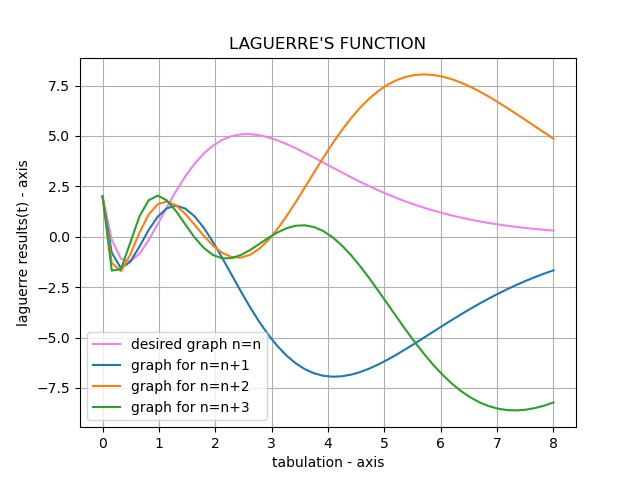

In [7]:
construct_a_graph(tabulate_laguerre(8,2,2,4))

In [ ]:
data_table = {
        'Tabulation' : [round(i,1) for i in tabulate_laguerre(8,2,2,4)['T']],
        'Lagguere results' : [round(i,5) for i in tabulate_laguerre(8,2,2,4)['L'][0]]
    }
df = pd.DataFrame(data_table, index = ["step"+str(number)+":   " for number in range(len(data_table['Tabulation']))])
df.style.set_properties(**{'color': 'green'})

,Tabulation,Lagguere results
step0:,0.000000,2.000000
step1:,0.200000,-0.157770
step2:,0.300000,-1.095500
step3:,0.500000,-1.224480
step4:,0.700000,-0.845810
step5:,0.800000,-0.176380
step6:,1.000000,0.630830
step7:,1.100000,1.470880
step8:,1.300000,2.274570
step9:,1.500000,2.999010
